# EDA: Exploratory Data Analysis

El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

<ol>
  <li>Resumir las principales características del conjunto de datos.</li>
  <li>Entender mejor el conjunto de datos que se está tratando.</li>
  <li>Establecer relaciones entre variables.</li>
  <li>Determinar si una variables es un buen predictor de una variable blanco.</li>
  <li>Extraer las variables más importantes.</li>
</ol>

**Objetivo:** Determinar las características que más impactan en lo que se busca establecer.

Para abordar el análisis exploratorio de datos, es útil aplicar las siguientes técnicas:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento: Método GroupBy()</li>  
  <li> Correlación de Pearson</li>
  <li> Mapas de correlación</li>
  <li> Análisis de variaciones: Anova</li>
</ol>

En primer lugar, carguemos el dataset de caractarísticas de carros que vamos a analizar.

## Pruebas de hipótesis

En muchos problemas de ingeniería, ciencias, datos, administración y muchas otras áreas del conocimiento es necesario decidir entre aceptar o rechazar una determinada hipótesis sobre una población a partir de datos proporcionados por una muestra de dicha población. Al procedimiento de decisión se le conoce como **prueba de hipótesis**. Siendo así, una prueba de hipótesis es una regla para decidir entre dos hipótesis de trabajo que son mutuamente excluyentes, la hipótesis nula o **$H_0$** y la hipótesis alternativa o **$H_1$**.

En las pruebas de hipótesis suele ser habitual querer rechazar la hipótesis nula **$H_0$** por lo que se busca evidencia que la refute, esta estará basada en datos de calidad, es decir, solo se rechaza **$H_0$** si la evidencia la refuta contundentemente. 

#### Tipos de errores
Si se elige una u otra hipótesis como cierta cuando en realidad esta no lo es, se producen errores de tipo I o tipo II:


<center>P(Error tipo I) = P(Escoger $H_1$ | $H_0$ es cierta) = $\alpha$</center>
<center>P(Error tipo II) = P(Escoger $H_0$ | $H_1$ es cierta) = $\beta$ </center>

Al valor $\alpha$ se le conoce como significancia estadística. Por ejemplo, en un juzgado, si 

<center>$H_0$: Es inocente </center>
<center>$H_1$: Es culpable </center>

El error tipo I se daría cuando se cataloga como culpable a un inocente, este tipo de error es el que se busca minimizar pues suele ser más grave que el error tipo II (se cataloga como inocente a un culpable). 

#### Criterios para rechazar $H_0$
<ul>
    <li>Estadístico de prueba $Z_c$: Se utiliza algún estadístico de prueba. Si su valor queda en zona de rechazo se rechaza $H_0$. </li>
    <li>p-value $V_p$: El p-value es la probabilidad de obtener el resultado obtenido dado que la hipótesis nula $H_0$ es cierta. Para trabajar con este valor se fija un nivel de significancia $\alpha$ y si el p-value es menor a este entonces se rechaza $H_0$. Es decir, valores altos de p-value llevan a aceptar $H_0$ y valores bajos a rechazar $H_0$.</li>
</ul>

En conclusión, se podría decir que entre más grande sea el valor del estadístico $Z_c$ o más pequeño sea el valor $V_p$ más improbable será que el resultado obtenido en un experimento sea producto de la casualidad por lo que el resultado tendrá mayor significancia.  
Por ejemplo, si $Z_c=2$ entonces $V_p=0.977$ (utilizando alguna tabla para la distribución normal), esto significa que solo hay una probabilidad de $1 - 0.977 = 0.023 = 2.3\%$ de encontrar un valor de $Z_c$ mayor a 2 por puro azar.  

Se pueden dar tres casos dependiendo del tipo de hipótesis nula:
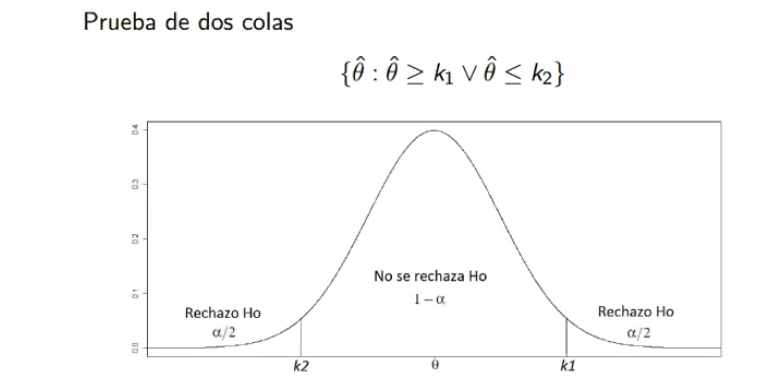
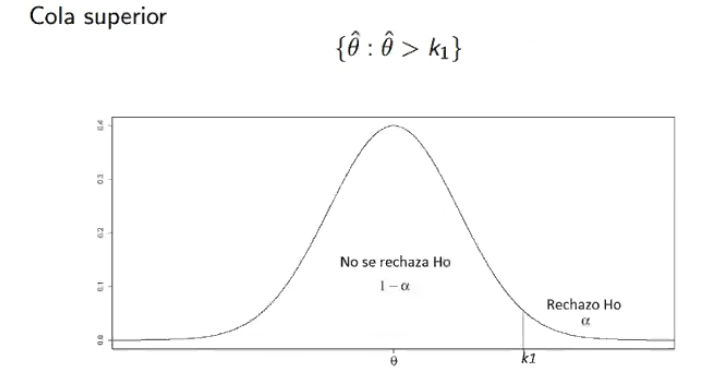
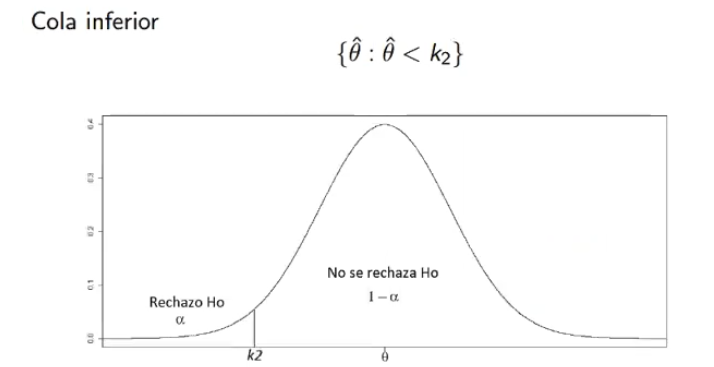

A partir de estos obtenemos el valor del p-value $V_p$ como
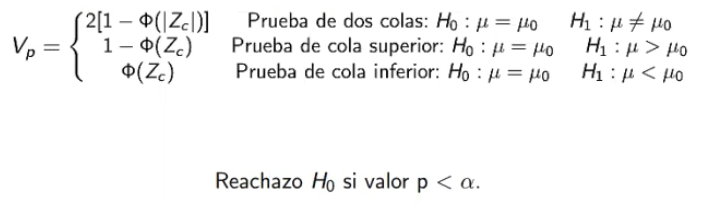

donde $\phi$ representa la probabilidad acumulada de la función de densidad asociada con $Z_c$.

In [1]:
#!pip install skimpy

# Cargar  librerías

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

from skimpy import skim
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)

## Importar los datos

In [3]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [4]:
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [5]:
# Columnas del DataFrame
df.columns = df.columns.str.replace("-", "_")
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_L/100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

#### Probando algunos tests

El módulo stats de la librería scipy de Python contiene múltiples pruebas de hipótesis que son de amplia aplicabilidad. 

Veamos la aplicabilidad de algunos tests para saber qué tipo de criterio de correlación aplicar. 

* Para la correlación de Pearson, ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.

* La correlación de Kendall es una prueba no paramétrica que no hace suposiciones sobre la distribución de los datos. Debe haber una **relación monotónica** entre las variables que se están probando y los datos deben medirse en una escala ordinal, de intervalo o de relación. https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_rango_de_Kendall

* Las correlación de Spearman es no paramétrica y no hace suposiciones sobre la distribución de los datos. Al igual que en el caso anterior, debe haber una **relación monotónica** entre las variables y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.
https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

En el caso de la correlación de Pearson, las suposiciones de normalidad de la distribución y homogeneidad de la varianza se pueden evaluar mediante las funciones `skewtest()` y `levene()`, respectivamente. Ambas pertenecientes al módulo `scipy.stats`. Evaluemos las suposiciones para las variables "price" y "engine_size"

In [7]:
from scipy.stats import skewtest, levene

Para ciencias blandas $\to$ Rechazar $V_p$ < 0.01

Algunas ciencias duras (fenomenolicas) $\to$ Rechazar $V_p$ < 0.005

Temas de ciencias duras (primeros principios) $\to$ Rechazar $V_p$ < 0.001

skewtest testea la hipótesis nula $H_0$ de que el skewness de que la población de la cual se tomó la muestra  es el mismo que el de una distribución normal.

In [8]:
df.select_dtypes([int, float]).columns

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'city_L/100km', 'diesel', 'gas'],
      dtype='object')

/tmp/ipykernel_28972/2525571671.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


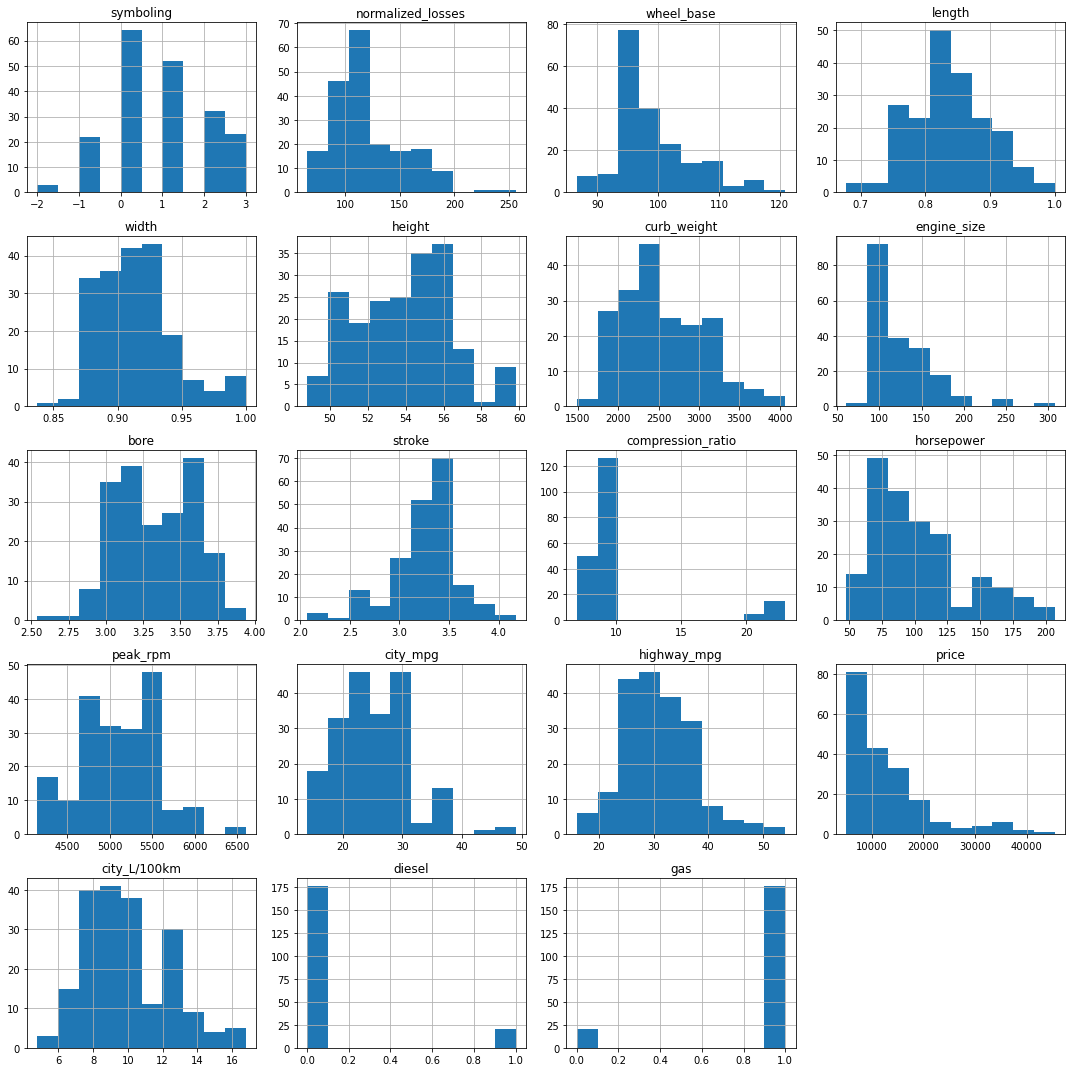

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
df.hist(ax=ax)
plt.tight_layout()
plt.show()

In [10]:
alpha = 0.05
for col in df.select_dtypes([int, float]).columns:
    print(f"{col: <20}" +  
          f"p_value = {round(skewtest(df[col]).pvalue, 8): <14}"+ 
          f"statistic = {round(skewtest(df[col]).statistic, 8):<15}" + 
          f"normal= {'sí' if skewtest(df[col]).pvalue>alpha else 'no'}")

symboling           p_value = 0.23881939    statistic = 1.17794284     normal= sí
normalized_losses   p_value = 4.03e-06      statistic = 4.60979857     normal= no
wheel_base          p_value = 4.5e-07       statistic = 5.04814955     normal= no
length              p_value = 0.41793205    statistic = 0.81001415     normal= sí
width               p_value = 6.89e-06      statistic = 4.49710784     normal= no
height              p_value = 0.63237667    statistic = 0.47838434     normal= sí
curb_weight         p_value = 0.00034578    statistic = 3.57834531     normal= no
engine_size         p_value = 0.0           statistic = 7.63473297     normal= no
bore                p_value = 0.89196766    statistic = -0.13581484    normal= sí
stroke              p_value = 0.0001424     statistic = -3.80397047    normal= no
compression_ratio   p_value = 0.0           statistic = 9.17535751     normal= no
horsepower          p_value = 1.5e-06       statistic = 4.81177342     normal= no
peak_rpm        

Para testear la homogeneidad en las varianzas se puede utilizar el test de Levene. Este testea la hipótesis nula de que las muestras vienen de poblaciones con igual varianza.

Un pequeño valor del p-value implica entonces fuerte evidencia a favor de la hipótesis nula. 

In [11]:
target_col = "price"

for col in df.select_dtypes([int, float]).columns:
    print(f"{col +'-'+target_col:<25}: p_value = {levene(df[col], df[target_col]).pvalue:<25}" + 
          f"Acepta H0:{'sí' if levene(df[col], df[target_col]).pvalue>alpha else 'no'}" )

symboling-price          : p_value = 3.0617150150024374e-27   Acepta H0:no
normalized_losses-price  : p_value = 4.708868139918677e-27    Acepta H0:no
wheel_base-price         : p_value = 3.271092584746761e-27    Acepta H0:no
length-price             : p_value = 3.0073672106488454e-27   Acepta H0:no
width-price              : p_value = 3.0060236782114107e-27   Acepta H0:no
height-price             : p_value = 3.1156389749867688e-27   Acepta H0:no
curb_weight-price        : p_value = 7.215862250356376e-24    Acepta H0:no
engine_size-price        : p_value = 5.026013277796028e-27    Acepta H0:no
bore-price               : p_value = 3.0179947304079218e-27   Acepta H0:no
stroke-price             : p_value = 3.017803028098374e-27    Acepta H0:no
compression_ratio-price  : p_value = 3.105450462143297e-27    Acepta H0:no
horsepower-price         : p_value = 5.093806552148086e-27    Acepta H0:no
peak_rpm-price           : p_value = 3.3302176072743695e-24   Acepta H0:no
city_mpg-price           

Se observa que sí hay una relación lineal entre las variables. Sin embargo, los tests de uniformidad de la distribución y homogeneidad arrojan resultados negativos. Por lo tanto, la prueba de correlación apropiada para usar sería una prueba no paramétrica como la correlación de Spearman o de Kendall.

In [12]:
corr_p = df.corr(numeric_only=True)
corr_k = df.corr(method = "kendall",  numeric_only=True)
corr_s = df.corr(method = "spearman", numeric_only=True)

In [13]:
corr_p.price.sort_values(ascending=False)

price                1.000000
engine_size          0.889265
curb_weight          0.828483
city_L/100km         0.803669
horsepower           0.802040
width                0.744176
length               0.689466
wheel_base           0.591956
bore                 0.544375
height               0.182407
normalized_losses    0.138183
diesel               0.117725
stroke               0.107893
compression_ratio    0.067759
symboling           -0.076420
peak_rpm            -0.103535
gas                 -0.117725
city_mpg            -0.692550
highway_mpg         -0.707466
Name: price, dtype: float64

In [14]:
corr_k.price.sort_values(ascending=False)

price                1.000000
curb_weight          0.746011
engine_size          0.695908
city_L/100km         0.670055
horsepower           0.662462
length               0.647641
width                0.635943
wheel_base           0.556485
bore                 0.493118
height               0.212043
normalized_losses    0.128643
diesel               0.124658
stroke               0.103274
peak_rpm            -0.058277
symboling           -0.119447
gas                 -0.124658
compression_ratio   -0.158824
highway_mpg         -0.659108
city_mpg            -0.670055
Name: price, dtype: float64

In [15]:
corr_s.price.sort_values(ascending=False)

price                1.000000
curb_weight          0.914856
engine_size          0.868536
horsepower           0.847796
city_L/100km         0.836280
length               0.820062
width                0.809803
wheel_base           0.694271
bore                 0.649214
height               0.305916
normalized_losses    0.193786
diesel               0.152227
stroke               0.131189
peak_rpm            -0.098273
gas                 -0.152227
symboling           -0.159412
compression_ratio   -0.207497
highway_mpg         -0.831154
city_mpg            -0.836280
Name: price, dtype: float64

Se puede ver que el precio del automóvil tiende a subir a medida que, por ejemplo, aumenta el tamaño del motor (engine-size), el ancho (width) y largo (length) del vehículo; no así de su altura (heigth) o del tipo de combustible que utiliza. El atributo más prometedor para predecir el precio del vehículo es el tamaño del motor (Pearson) y el peso del motor (kendall).

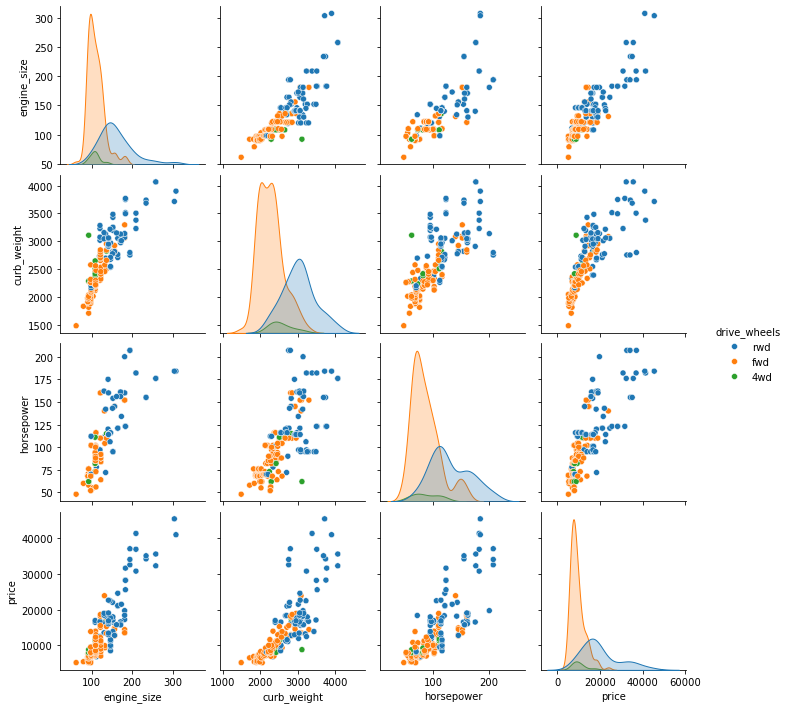

In [16]:
sbn.pairplot(df, hue = "drive_wheels", vars = ["engine_size","curb_weight","horsepower","price"])

In [17]:
# Con pandas
#pd.plotting.scatter_matrix(df[["engine_size","curb_weight","horsepower","price"]], figsize=(12, 8))
#plt.show()

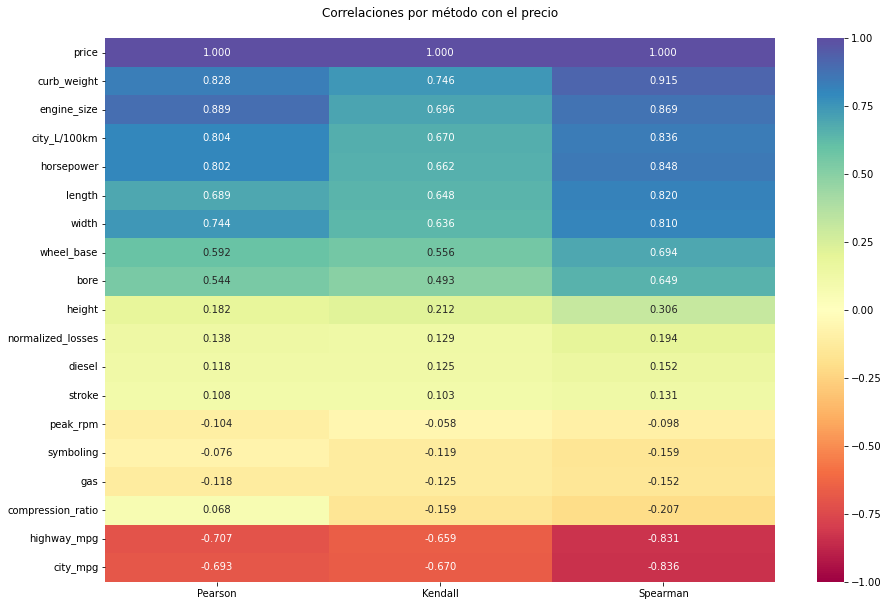

In [18]:
fig, ax = plt.subplots(figsize=(15,10))

sbn.heatmap(pd.DataFrame([corr_p.price, corr_k.price, corr_s.price], 
                         index=["Pearson", "Kendall", "Spearman"]).transpose()\
            .sort_values(by="Kendall", ascending=False),
            vmin=-1, vmax=1, center=0,
            cmap=sbn.color_palette("Spectral", as_cmap=True),
            annot=True, fmt='.3f',
            ax=ax)

ax.set_title("Correlaciones por método con el precio\n")
plt.show()

# Análisis de varianza (ANOVA)

El análisis de varianza es un método estadístico que se usa para probar si existe diferencias significativas entre las medias de dos o mas grupos. ANOVA arroja como resultados dos parámetros:

<ol>
    <li>F-test score: En ANOVA se asume que todos los valores medios de los diferentes grupos son el mismo, se calcula que tanto se desvia de este supuesto y se reporta por medio del puntaje F-test. Entre más grande sea este valor, mayor diferencia existirá entre los valores medios.</li>
    <li>P-Value: Este valor nos indica que tanta significancia estadística tienen nuestro puntaje.</li>
</ol>

El test de análisis de varianzas puede pensarse como una generalización del t-test a más de dos grupos. En ANOVA, la **hipotesis nula** establece que **las medias de las poblaciones de las cuales se tomaron las muestras de los grupos son iguales**. De forma más concisa tenemos que:

$\mu_1=\cdots=\mu_n$
 
Para un grupo de $n$ datos. La hipótesis alternativa sería que alguna de las medias de la ecuación anterior no se cumpla. Por lo tanto, tener un F-value alto y un p-value pequeño, implica que la probabilidad de que la hipótesis nula sea cierta es baja, por tanto, decimos que la hipotesis alternativa se debe cumplir.

Generalmente se asume que el ANOVA es un "análisis de dependencias" y se conoce como tal, ya que es una prueba para demostrar una supuesta relación de causa y efecto. En ese sentido si la variable precio(Y) que estamos analizando esta fuertemente correlacionada con una variable, esperamos que ANOVA nos devuelva un puntaje razonable del F-test y un valor pequeño del P-Value.

El el test one-way ANOVA es una técnica que es usada para variables blanco numéricas ("Y", siguendo la notación establecida), usualmente una variable, y datos de entrada de solo una variable numérica o categórica, por tal motivo se le conoce como "one-way".

### ANOVA para la reducción dimensional

También es posible aprovechar el análisis ANOVA para hacer reducción dimensional o limpieza de ruido, ya que éste nos entrega información sobre qué variables son más importantes para el modelado.

Veamos qué tal funciona éste método para limpar de ruido nuestros datos si los usamos para predecir el precio del auto.

In [19]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [20]:
# Para esto se utilizarán solo columnas de tipo numérico
# we are going to work only with numeric data
df2 = df.select_dtypes([float]).dropna()
df2.dtypes

wheel_base           float64
length               float64
width                float64
height               float64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
price                float64
city_L/100km         float64
dtype: object

In [21]:
df2

,wheel_base,length,width,height,bore,stroke,compression_ratio,horsepower,peak_rpm,price,city_L/100km
0,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476
1,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476
2,94.5,0.822681,0.909722,52.4,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421
3,99.8,0.848630,0.919444,54.3,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667
4,99.4,0.848630,0.922222,54.3,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...
191,109.1,0.907256,0.956944,55.5,3.78,3.15,9.5,114.0,5400.0,16845.0,10.217391
192,109.1,0.907256,0.955556,55.5,3.78,3.15,8.7,160.0,5300.0,19045.0,12.368421
193,109.1,0.907256,0.956944,55.5,3.58,2.87,8.8,134.0,5500.0,21485.0,13.055556
194,109.1,0.907256,0.956944,55.5,3.01,3.40,23.0,106.0,4800.0,22470.0,9.038462


In [22]:
# Correlaciones
df2.corr(method = "spearman").sort_values(by="price", ascending=False).price

price                1.000000
horsepower           0.847796
city_L/100km         0.836280
length               0.820062
width                0.809803
wheel_base           0.694271
bore                 0.649214
height               0.305916
stroke               0.131189
peak_rpm            -0.098273
compression_ratio   -0.207497
Name: price, dtype: float64

In [23]:
# Se analizará la dependencia del precio (target) con las otras variables numéricas (features)
y = df2.price
X = df2.drop("price", axis=1)
print(y.shape, X.shape)

(196,) (196, 10)


In [24]:
#f_regression(X, y)

In [25]:
# Para reducir la dimensionalidad se utiliza sklearn.feature_selection.SelectPercentile
# Este método de sklearn toma como argumento una función que retorne por resultado el score (f_score para ANOVA) 
# y el p-value.
sel = SelectPercentile(score_func=f_regression, percentile=50)
sel.fit(X, y)
X_sel = sel.transform(X)

#the change in dimentionaly
X.shape, X_sel.shape

/home/brayan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/brayan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


((196, 10), (196, 5))

In [26]:
# Features seleccionadas para el modelo
sel.get_feature_names_out()

array(['wheel_base', 'length', 'width', 'horsepower', 'city_L/100km'],
      dtype=object)

In [27]:
# Features seleccionadas para el modelo
for cols in zip(sel.get_support(), X.columns): 
    print(cols)

(True, 'wheel_base')
(True, 'length')
(True, 'width')
(False, 'height')
(False, 'bore')
(False, 'stroke')
(False, 'compression_ratio')
(True, 'horsepower')
(False, 'peak_rpm')
(True, 'city_L/100km')


Este proceso de reducción dimensional se utiliza para obtener un conjunto de datos que ayude a mejorar las predicciones.

A continuación se prueba esta selección para el modelo. Para ello se dividen los datos en dos conjuntos: de testeo (testing) y de entrenamiento (training). Los datos de entrenamiento se utilizarán para construir el modelo y los de testeo para ponerlo a prueba. 

In [28]:
#1. Dividiendo los datos en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

#2. Seleccionando los nuevos datos
#2.a Se inicializa el selector
select = SelectPercentile(score_func=f_regression, percentile=95)

#2.b Datos para el entrenamiento
select.fit(X_train, y_train)
X_train_sel = select.transform(X_train)

#2.c. Datos para el testeo
X_test_sel = select.transform(X_test)

/home/brayan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/brayan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/brayan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [29]:
#3. Testeo
lr     = LinearRegression().fit(X_train, y_train)      # Con todas las columnas
lr_sel = LinearRegression().fit(X_train_sel, y_train)  # Con las columnas seleccionadas

#3.b. Comparando reultados
print("Score todas las cols: ", lr.score(X=X_test, y=y_test))
print("Score cols selecccionadas: ", lr_sel.score(X=X_test_sel, y=y_test))

Score todas las cols:  0.8107193547824856
Score cols selecccionadas:  0.8259427599472928


/home/brayan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/brayan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


## Testeo de modelos con ANOVA

Se puede utilizar ANOVA para ver qué tan bueno es un modelo. Para ello se construyen diferentes modelos usando diferentes variables para predecir un target "y" (el precio) y se ve cómo estas variables afectan las estadísticas del modelo. 

In [30]:
df.corr(numeric_only=True).price.sort_values(ascending=False)

price                1.000000
engine_size          0.889265
curb_weight          0.828483
city_L/100km         0.803669
horsepower           0.802040
width                0.744176
length               0.689466
wheel_base           0.591956
bore                 0.544375
height               0.182407
normalized_losses    0.138183
diesel               0.117725
stroke               0.107893
compression_ratio    0.067759
symboling           -0.076420
peak_rpm            -0.103535
gas                 -0.117725
city_mpg            -0.692550
highway_mpg         -0.707466
Name: price, dtype: float64

In [31]:
# y = mx + b
# price = Coef*horsepower + Intercp
anova_hp = ols('price ~ horsepower', data=df).fit()
anova_hp.summary()

/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     349.8
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.69e-45
Time:                        17:51:50   Log-Likelihood:                -1935.0
No. Observations:                 196   AIC:                             3874.
Df Residuals:                     194   BIC:                             3881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4879.5060   1018.331     -4.792      0.000   -6887.928   -2871.084
horsepower   175.4056      9.378     18.704      0.000     156.909     193.902
==============================================================================
Omnibus:                       33.233   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.147
Skew:                           0.925   Prob(JB):                     4.75e-12
Kurtosis:                       4.721   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# price = Coef*engine_size + Intercp
anova_ez = ols('price ~ engine_size', data=df).fit()
anova_ez.summary()

/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     733.3
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           8.02e-68
Time:                        17:51:50   Log-Likelihood:                -1882.7
No. Observations:                 196   AIC:                             3769.
Df Residuals:                     194   BIC:                             3776.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9820.3362    884.658    -11.101      0.000   -1.16e+04   -8075.555
engine_size   180.4765      6.665     27.080      0.000     167.332     193.621
==============================================================================
Omnibus:                       17.807   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.481
Skew:                           0.544   Prob(JB):                     1.78e-06
Kurtosis:                       4.435   Cond. No.                         455.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# y = m1x1 +m2x2 + b
anova_e_h = ols('price ~ engine_size+horsepower', data=df).fit() 
anova_e_h.summary()

/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     399.2
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.62e-69
Time:                        17:51:50   Log-Likelihood:                -1875.7
No. Observations:                 196   AIC:                             3757.
Df Residuals:                     193   BIC:                             3767.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.006e+04    857.994    -11.730      0.000   -1.18e+04   -8371.903
engine_size   144.7089     11.417     12.675      0.000     122.192     167.226
horsepower     46.6977     12.303      3.796      0.000      22.433      70.962
==============================================================================
Omnibus:                        8.499   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               14.345
Skew:                           0.171   Prob(JB):                     0.000767
Kurtosis:                       4.280   Cond. No.                         587.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Con categóricas
anova_make_h=ols('price ~ C(make)+horsepower', data=df).fit() # y = m1x1 + m2x2 + b
anova_make_h.summary()

/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/home/brayan/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     86.40
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.46e-81
Time:                        17:51:51   Log-Likelihood:                -1792.6
No. Observations:                 196   AIC:                             3631.
Df Residuals:                     173   BIC:                             3707.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1980.1858   1625.871      1.218      0.225   -1228.912    5189.283
C(make)[T.audi]           3529.2902   1709.238      2.065      0.040     155.644    6902.936
C(make)[T.bmw]            9159.8455   1637.502      5.594      0.000    5927.792    1.24e+04
C(make)[T.chevrolet]     -2732.2596   2015.733     -1.355      0.177   -6710.856    1246.337
C(make)[T.dodge]         -3416.4440   1630.935     -2.095      0.038   -6635.537    -197.351
C(make)[T.honda]         -2448.9885   1575.879     -1.554      0.122   -5559.413     661.436
C(make)[T.isuzu]         -2123.7208   2221.825     -0.956      0.340   -6509.095    2261.653
C(make)[T.jaguar]         1.294e+04   2230.410      5.800      0.000    8534.564    1.73e+04
C(make)[T.mazda]          -485.1305   1578.584     -0.307      0.759   -3600.894    2630.633
C(make)[T.mercedes-benz]  1.589e+04   1640.952      9.685      0.000    1.27e+04    1.91e+04
C(make)[T.mercury]       -4352.2588   2808.297     -1.550      0.123   -9895.196    1190.678
C(make)[T.mitsubishi]    -3965.8996   1553.368     -2.553      0.012   -7031.893    -899.906
C(make)[T.nissan]        -2625.9111   1513.706     -1.735      0.085   -5613.622     361.799
C(make)[T.peugot]         2742.7596   1582.211      1.733      0.085    -380.164    5865.683
C(make)[T.plymouth]      -3369.5485   1686.355     -1.998      0.047   -6698.028     -41.069
C(make)[T.porsche]        8819.5202   1895.857      4.652      0.000    5077.532    1.26e+04
C(make)[T.renault]       -3630.0006   2209.124     -1.643      0.102   -7990.306     730.305
C(make)[T.saab]           -418.8101   1707.733     -0.245      0.807   -3789.484    2951.864
C(make)[T.subaru]        -2741.6504   1580.577     -1.735      0.085   -5861.348     378.048
C(make)[T.toyota]        -2101.5325   1474.320     -1.425      0.156   -5011.503     808.437
C(make)[T.volkswagen]     -648.1363   1586.629     -0.408      0.683   -3779.779    2483.506
C(make)[T.volvo]          2277.2283   1573.127      1.448      0.150    -827.765    5382.221
horsepower                 107.8576      6.672     16.166      0.000      94.689     121.027
==============================================================================
Omnibus:                       53.864   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.694
Skew:                           1.126   Prob(JB):                     3.47e-35
Kurtosis:                       6.790   Cond. No.                     4.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+03. This might indicate that there are
strong mult